<h1 >TP3</h1>
<h1>Autoencoders</h1>

# L'objectif de ce TP est de mettre en œuvre un autoencodeur pour trois exemples : un exemple de base, le débruitage d'images et la détection d'anomalies.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model


from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Charger le jeu de données Fashion MNIST

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()




(60000, 28, 28)
(10000, 28, 28)


# Normaliser les valeurs des pixels entre 0 et 1

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

# Fonction pour visualiser les images du jeu de données

In [ ]:
def visualisation(X):
  fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(28, 28))
  for i, ax in enumerate(axes.flatten()):
    ax.imshow(X[i], cmap='gray')
    ax.axis('off')
  plt.tight_layout()
  plt.show()


# Visualiser quelques images de l'ensemble d'entraînement

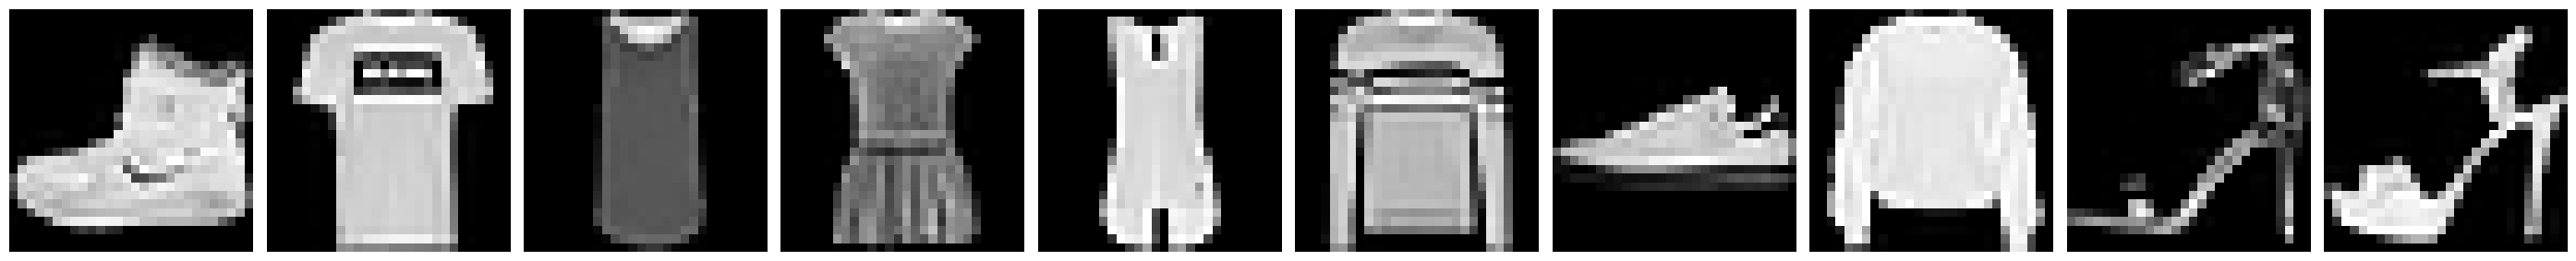

In [ ]:
visualisation(x_train)

# Classe Autoencoder

In [ ]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [ ]:
shape = x_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(latent_dim, shape)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

# Entraîner l'autoencodeur

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 14s 5ms/step - loss: 0.0236 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0115 - val_loss: 0.0105
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0100 - val_loss: 0.0096
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.00

# Obtenir les images encodées et décodées

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
encoded_imgs[0].shape

(64,)


# Visualiser les images originales et reconstruites

Images Originals


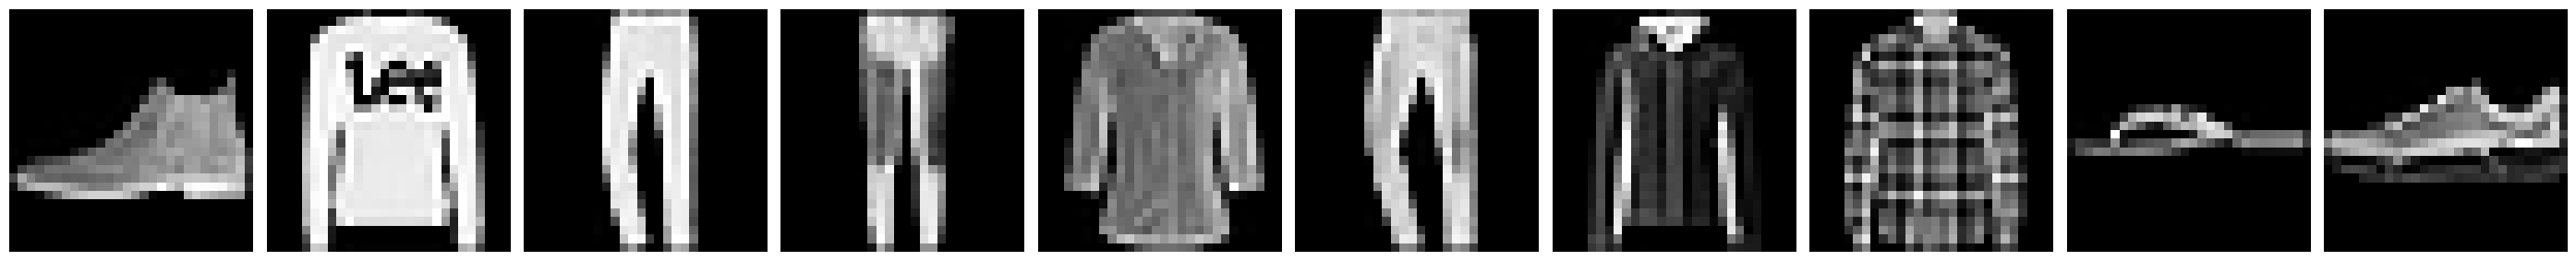

Image Reconstruits


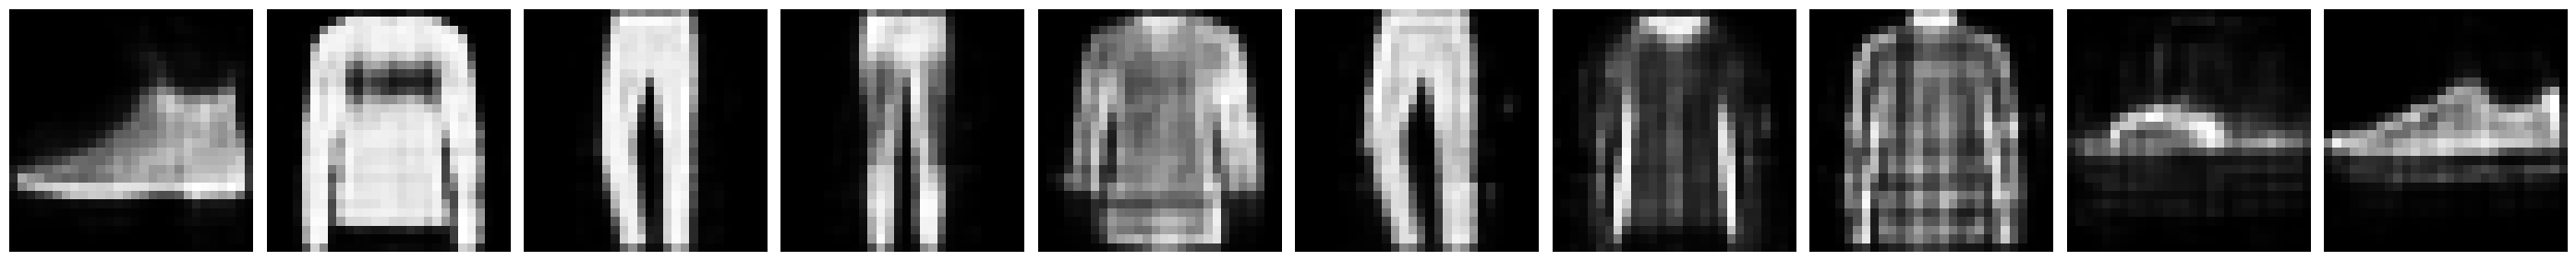

In [ ]:
print("Images Originals")
visualisation(x_test)
print("Image Reconstruits")
visualisation(decoded_imgs)

# Ajouter du bruit aux images

In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)




# Limiter les images bruitées entre 0 et 1

In [ ]:
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)


# Visualiser les images bruitées

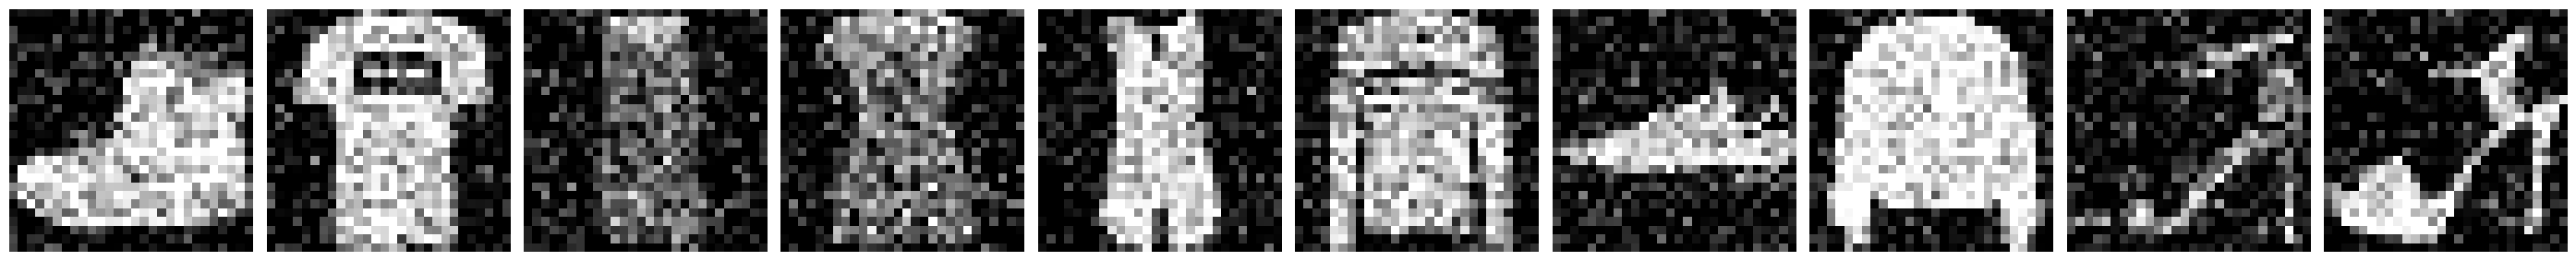

In [ ]:
visualisation(x_train_noisy)

# Classe Denoise (Autoencodeur de débruitage)

In [ ]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

# Entraîner l'autoencodeur de débruitage

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 0.0131 - val_loss: 0.0053
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0042 - val_loss: 0.0035
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.00

# Afficher le résumé de l'encodeur

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1320 (5.16 KB)
Trainable params: 1320 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Obtenir les images encodées et décodées à partir de l'autoencodeur de débruitage

In [ ]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

# Visualisation les images bruitées et

Original + Noise


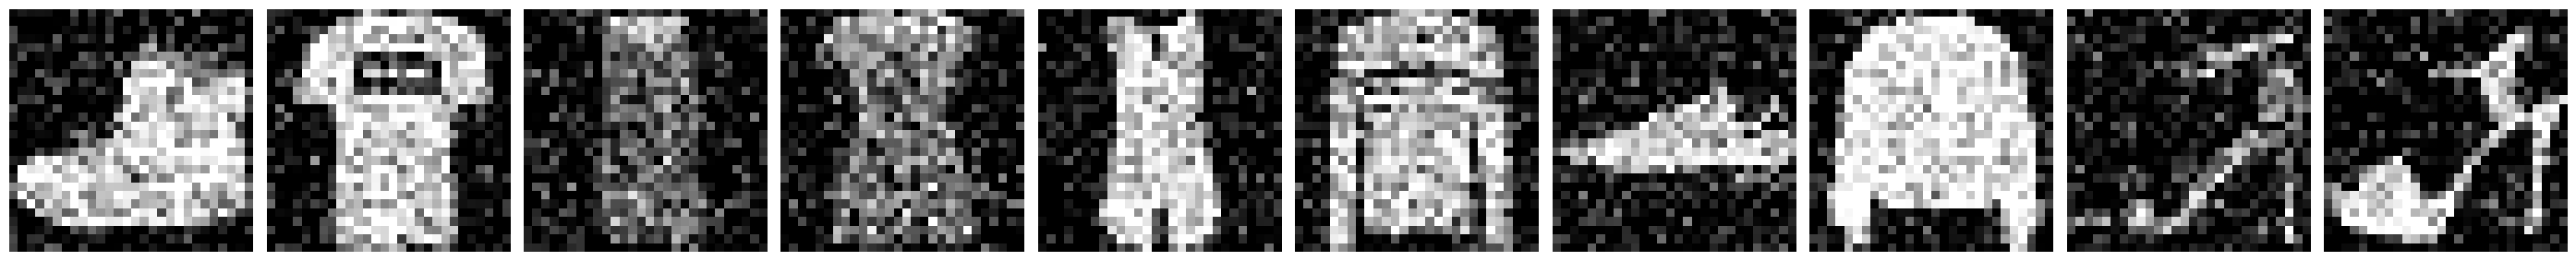

Image Reconstruits


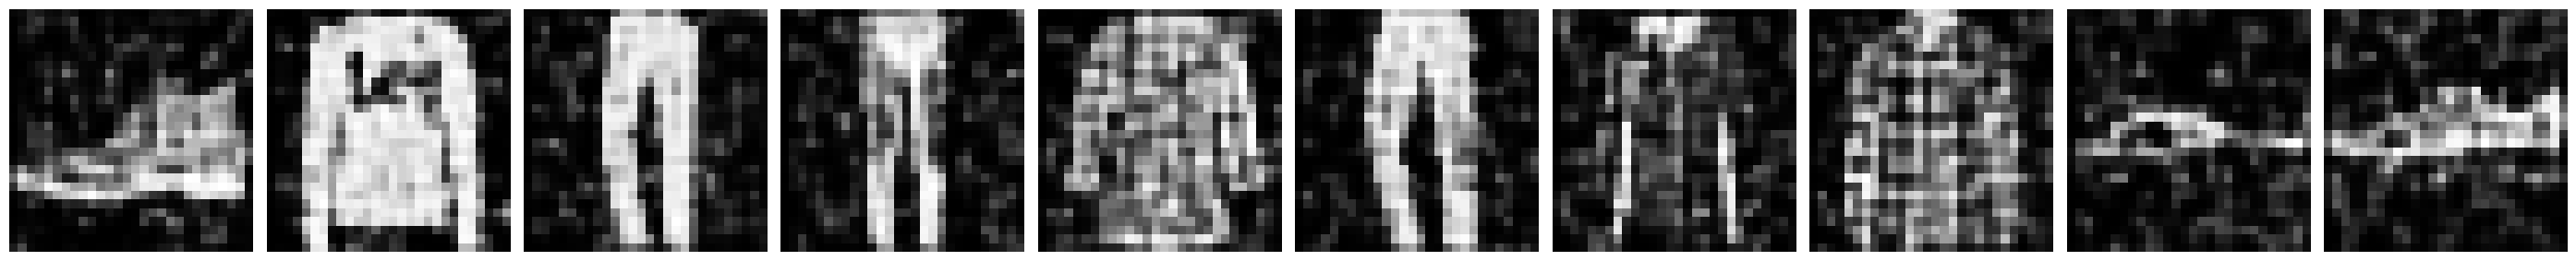

In [ ]:
print("Original + Noise")
visualisation(x_train_noisy)
print("Image Reconstruits")
visualisation(decoded_imgs)


# Chargement des données ECG à partir du fichier CSV situé à l'adresse http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv.

In [ ]:
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


# Prétraitement des données en divisant les données d'entraînement et de test, en normalisant les valeurs des données et en convertissant les étiquettes en booléens.

In [ ]:

labels = raw_data[:, -1]

data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

In [ ]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [ ]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

# Visualisation d'un exemple d'ECG normal et d'un exemple d'ECG anormal.

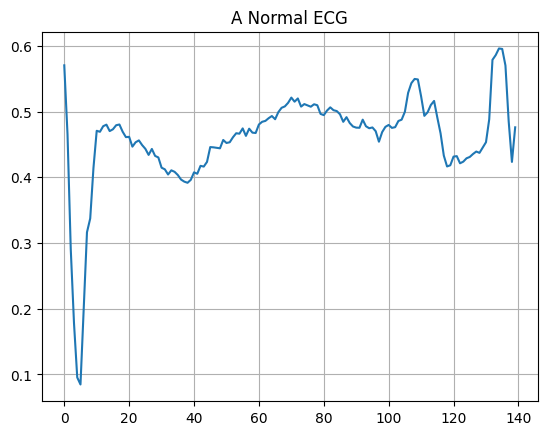

In [ ]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

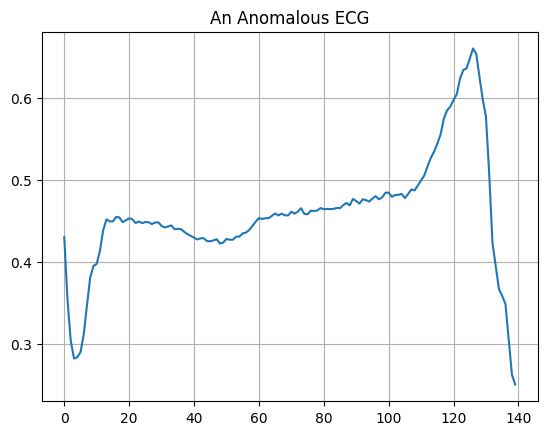

In [ ]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

# Définition d'un modèle d'apprentissage automatique pour la détection d'anomalies. Ce modèle est un autoencodeur avec des couches d'encodeur et de décodeur.

In [ ]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded



# Initialisation et compilation du modèle

In [ ]:
autoencoder = AnomalyDetector()
autoencoder.compile(optimizer='adam', loss='mae')

# Entraînement du modèle

In [ ]:
history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=20,
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 4s 43ms/step - loss: 0.0576 - val_loss: 0.0531
Epoch 2/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0548 - val_loss: 0.0513
Epoch 3/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0512 - val_loss: 0.0505
Epoch 4/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0476 - val_loss: 0.0481
Epoch 5/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0439 - val_loss: 0.0458
Epoch 6/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0405 - val_loss: 0.0445
Epoch 7/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0376 - val_loss: 0.0429
Epoch 8/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0349 - val_loss: 0.0418
Epoch 9/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0325 - val_loss: 0.0404
Epoch 10/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0304 - val_loss: 0.0393
Epoch 11/20
5/5 [=============

# Visualisation des courbes de loss

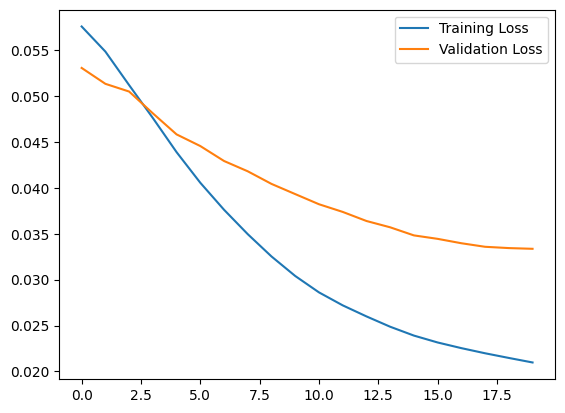

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

# Reconstruction et visualisation des données d'ECG normales à partir du modèle

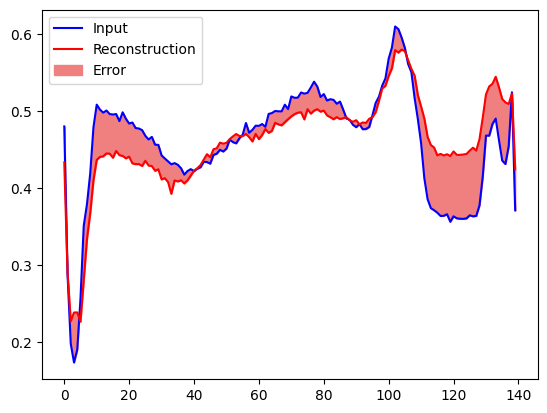

In [ ]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

# Reconstruction et visualisation des données d'ECG anormales à partir du modèle

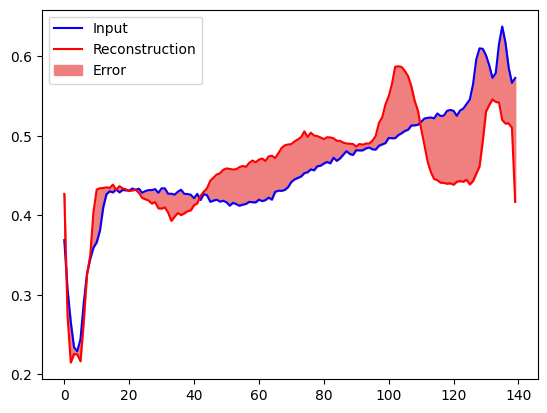

In [ ]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

# Calcul des pertes d'apprentissage pour les données d'entraînement normales ,puis  Création d'un histogramme pour les pertes d'apprentissage des données d'entraînement normales

74/74 [==============================] - 0s 2ms/step


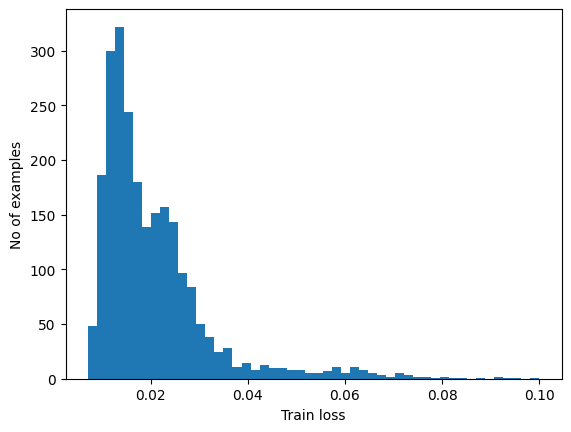

In [ ]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.03261033


# Création d'un histogramme pour les pertes d'apprentissage des données de test anormales

14/14 [==============================] - 0s 3ms/step


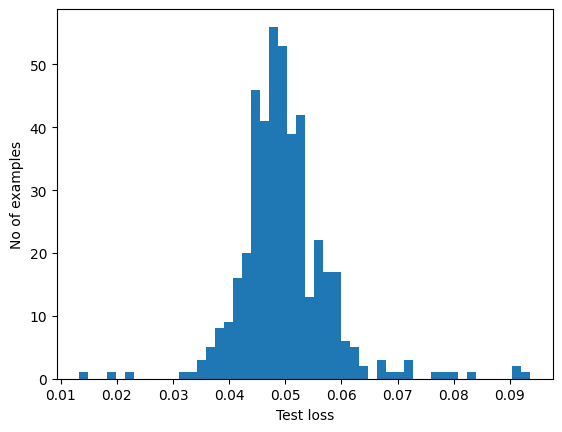

In [ ]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [ ]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.945
Precision = 0.9922027290448343
Recall = 0.9089285714285714
